In [1]:
import pandas as pd

# 단순이동평균

In [2]:
df = pd.read_csv("실기 Python 실습파일 (2)/seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [3]:
df_sub = df.loc[(df["노선명"] =="1호선")&(df["역명"]== "종로3가"),]
df_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
1,20191201,1호선,종로3가,19646,17772,20191204
593,20191202,1호선,종로3가,34277,32405,20191205
1184,20191203,1호선,종로3가,34957,32832,20191206
1776,20191204,1호선,종로3가,36007,33498,20191207
2426,20191205,1호선,종로3가,35536,33702,20191208


In [5]:
df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window =5).mean()
df_sub.head(8)

C:\Users\82103\AppData\Local\Temp/ipykernel_24528/2864338070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window =5).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5
1,20191201,1호선,종로3가,19646,17772,20191204,NaN
593,20191202,1호선,종로3가,34277,32405,20191205,NaN
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2


# 지수평활계수

In [6]:
df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha =0.1).mean()
df_sub.head(8)

C:\Users\82103\AppData\Local\Temp/ipykernel_24528/231271377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha =0.1).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5,EWMA_01
1,20191201,1호선,종로3가,19646,17772,20191204,NaN,19646.000000
593,20191202,1호선,종로3가,34277,32405,20191205,NaN,27346.526316
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN,30154.819188
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN,31856.529224
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6,32755.034944
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8,33499.224055
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8,34301.936545
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2,32283.977835


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
df = pd.read_csv("실기 Python 실습파일 (2)/seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [22]:
df = df.set_index("사용일자")
df.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191201,1호선,종로3가,19646,17772,20191204


In [23]:
df_sub = df.loc[(df["노선명"] =="1호선")&(df["역명"]== "종각"),]
df_sub.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191202,1호선,종각,48153,46770,20191205


In [24]:
#seasonal_decompose(df_sub["승차총승객수"])
df_sub = df_sub.reset_index()
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191202,1호선,종각,48153,46770,20191205


In [25]:
pd.to_datetime(df_sub["사용일자"][:4])

0   1970-01-01 00:00:00.020191201
1   1970-01-01 00:00:00.020191202
2   1970-01-01 00:00:00.020191203
3   1970-01-01 00:00:00.020191204
Name: 사용일자, dtype: datetime64[ns]

In [26]:
pd.to_datetime(df_sub["사용일자"][:4], format ="%Y%m%d")

0   2019-12-01
1   2019-12-02
2   2019-12-03
3   2019-12-04
Name: 사용일자, dtype: datetime64[ns]

In [27]:
df_sub["사용일자"]=pd.to_datetime(df_sub["사용일자"], format ="%Y%m%d" )
df_sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-12-01,1호선,종각,19093,17141,20191204
1,2019-12-02,1호선,종각,48153,46770,20191205


In [28]:
df_sub = df_sub.set_index("사용일자")
df_sub.head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
2019-12-01,1호선,종각,19093,17141,20191204
2019-12-02,1호선,종각,48153,46770,20191205


In [29]:
seasonal_decompose(df_sub["승차총승객수"])

In [32]:
result = seasonal_decompose(df_sub["승차총승객수"][:200])
result

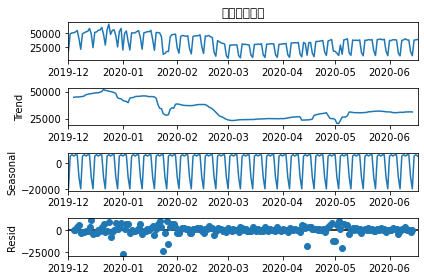

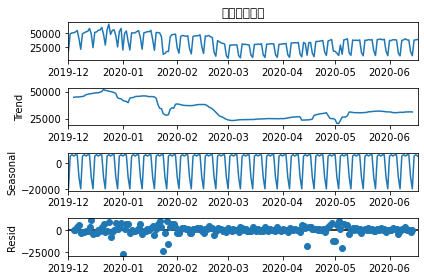

In [33]:
result.plot()

In [34]:
result.trend

사용일자
2019-12-01             NaN
2019-12-02             NaN
2019-12-03             NaN
2019-12-04    44560.142857
2019-12-05    44932.000000
                  ...     
2020-06-13    31186.714286
2020-06-14    31021.857143
2020-06-15             NaN
2020-06-16             NaN
2020-06-17             NaN
Name: trend, Length: 200, dtype: float64

Q1.

Q2.

In [35]:
df = pd.read_csv("실기 Python 실습파일 (2)/seoul_subway.csv")
df.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [36]:
df_sub = df.loc[(df["노선명"] =="6호선")&(df["역명"]== "이태원"),]

In [39]:
df_sub["하차_EWMA_01"] = df_sub["하차총승객수"].ewm(alpha =0.1).mean()
df_sub["하차_EWMA_09"] = df_sub["하차총승객수"].ewm(alpha =0.9).mean()
df_sub.head(2)

C:\Users\82103\AppData\Local\Temp/ipykernel_24528/2263447450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["하차_EWMA_01"] = df_sub["하차총승객수"].ewm(alpha =0.1).mean()
C:\Users\82103\AppData\Local\Temp/ipykernel_24528/2263447450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["하차_EWMA_09"] = df_sub["하차총승객수"].ewm(alpha =0.9).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,하차_EWMA_01,하차_EWMA_09
439,20191201,6호선,이태원,15817,12541,20191204,12541.000000,12541.000000
1030,20191202,6호선,이태원,12771,12974,20191205,12768.894737,12934.636364


In [40]:
df_sub.tail(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,하차_EWMA_01,하차_EWMA_09
216071,20201129,6호선,이태원,5239,4996,20201202,8297.397173,5167.201462
216590,20201130,6호선,이태원,7059,7109,20201203,8178.557456,6914.820146


In [42]:
df_sub["diff"]=df_sub["하차_EWMA_01"]-df_sub["하차_EWMA_09"]
df_sub.tail(2)

C:\Users\82103\AppData\Local\Temp/ipykernel_24528/2616351202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["diff"]=df_sub["하차_EWMA_01"]-df_sub["하차_EWMA_09"]


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,하차_EWMA_01,하차_EWMA_09,diff
216071,20201129,6호선,이태원,5239,4996,20201202,8297.397173,5167.201462,3130.195711
216590,20201130,6호선,이태원,7059,7109,20201203,8178.557456,6914.820146,1263.737309


Q3

In [49]:
sub = pd.read_csv("실기 Python 실습파일 (2)/seoul_subway.csv")
sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204


In [50]:
sub = sub.loc[(sub["노선명"] =="3호선")&(sub["역명"]== "신사"),]
sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
76,20191201,3호선,신사,18120,18435,20191204
668,20191202,3호선,신사,34918,37450,20191205


In [51]:
sub["date"]=pd.to_datetime(sub["사용일자"], format ="%Y%m%d" )
sub.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,date
76,20191201,3호선,신사,18120,18435,20191204,2019-12-01
668,20191202,3호선,신사,34918,37450,20191205,2019-12-02


In [52]:
sub = sub.set_index("date")
sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
date,,,,,,
2019-12-01,20191201,3호선,신사,18120,18435,20191204
2019-12-02,20191202,3호선,신사,34918,37450,20191205
2019-12-03,20191203,3호선,신사,36095,38205,20191206
2019-12-04,20191204,3호선,신사,35617,38286,20191207
2019-12-05,20191205,3호선,신사,35749,38480,20191208


In [53]:
td=seasonal_decompose(sub["승차총승객수"],
                      model = "addictive",
                      extrapolate_trend = 1)

In [54]:
td.trend.tail()

date
2020-11-26    23306.571429
2020-11-27    22918.285714
2020-11-28    22202.571429
2020-11-29    21650.571429
2020-11-30    21098.571429
Name: trend, dtype: float64